# Subset Selection 

## Best Subset Selection

The main idea behind this method is fit a separate least squares regression for each possible combination of the $p$ predictors. In other words, fit all $p$ models that contain exactly one predictor, all $\binom{p}{2}$ models that contain exactly two predictors, and so forth. Then, we look at all of the resulting models in order to idenfity the one that is the best. 

*Algorithm - Best Subset Selection*

1. Let $M_0$ be the null model, which contains no predictors. This model simply predicts the sample mean for each observation.
2. For $k = 1, 2, ..., p$:
   - Fit all $\binom{p}{k}$ models that contain exactly $k$ predictors.
   - Pick the best among these $\binom{p}{k}$ models, and call it $M_k$. We define best as having the smallest $RSS$, or equivalently the largest $R^2$.
3. Select a single best model from among $M_0, ..., M_p$ using cross-validated prediction error, $C_p$, AIC, BIC, or adjusted $R^2$.

This method is a simple and conceptually appealing approach, but it has some computational limitations. The number of possible models that must be considered grows rapidly as the number of predictors increases. 

**N o t e**\
There are $2^p$ models that involve subsets of $p$ predictors.

### Stepwise Selection

Stepwise methods are alternatives to best subset selection as they explore a more restricted number of models. 

#### Forward Stepwise Selection

Forward stepwise selection begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, until all of the predictors are in the model. At each step the variable that gives the greatest additional improvement to the fit is added to the model. 

Forward stepwise selection involves fitting one null model, along with $p - k$ models in the $k$th iteration, for $k = 0, ..., p - 1$. This amounts to a total of $1 + \sum_{k = 0}^{p - 1}(p - k) = 1 + p(p + 1)/2$ models.

*Algorithm - Forward Stepwise Selection*

1. Let $M_0$ be the null model, which contains no predictors.
2. For $k = 0, 1, ..., p - 1$:
   - Consider all $p - k$ models that augment the predictors in $M_k$ with one additional predictor.
   - Choose the best among these $p - k$ models, and call it $M_{k + 1}$. Same as before, we define best as having the smallest $RSS$, or highest $R^2$.
3. Select a single best model from among $M_0, ..., M_p$ using cross-validated prediction error, $C_p$, AIC, BIC, or adjusted $R^2$.

Compared to best subset selection, forward stepwise selection has a clear computational advantage. However, this method is not guaranteed to find the best possible model out of all $2^p$ models containing subsets of the $p$ predictors. Consider a data set with $p = 3$, where the best possible one-variable model contains $X_1$, and the best possible two-variable model instead contains $X_2$ and $X_3$. In this scenario, forward stepwise selection will fail to select the best possible two-variable model because $M_1$ will contain $X_1$, so $M_2$ must also contain $X_1$ together with one additional variable.

Forward stepwise selection can be applied in high-dimensional settings, but it is limited in that it can only construct submodels with $n − 1$ predictors to ensure that the least squares fitting process yields unique solutions. With multiple solutions, it becomes difficult to interpret the meaning of the coefficients, as they may not reflect consistent relationships with the response variable.

#### Backward Stepwise Selection

Just like forward stepwise selection, backward stepwise selection provides an efficient alternative to best subset selection. Unlike forward stepwise selection, it begins with the full least squares model containing all $p$ predictors, and then iteratively removes the least useful predictor, one-at-a-time.

*Algorithm - Backward Stepwise Selection*

1. Let $M_p$ be the full model, which contains all $p$ predictors.
2. For $k = p, p - 1, ..., 1$:
   - Consider all $k$ models that contain all but one of the predictors in $M_k$, for a total of $k - 1$ predictors.
   - Choose the best among these $k$ models, and call it $M_{k - 1}$. Same as before, we define best as having the smallest $RSS$, or highest $R^2$.
3. Select a single best model from among $M_0, ..., M_p$ using cross-validated prediction error, $C_p$, AIC, BIC, or adjusted $R^2$.

Backward stepwise selection approach searches through only $1 + p(p + 1)/2$ models, and so can be applied in settings where $p$ is to large to apply best subset selection. Also like forward stepwise selection, backward stepwise selection is not guaranteed to yield the best model containing a subset of the $p$ predictors. 

It requires that the number of samples $n$ is larger than the number of variables $p$ (so that the full model can be fit). Considering this, forward stepwise selection is the only viable subset method when $p$ is very large. 

### Choosing the Optimal Model

Best subset selection, forward selection, and backward selection result in the creation of a set of models, each of which contains a subset of the $p$ predictors. To appply these methods, we need a way to determine which of these models is best.

The model containing all of the predictors will always have the smallest RSS and the largest $R^2$, since these quantities are related to the training error. But instead, we wish to choose a model with a low test error. In general, the training error will decrease as more variables are included in the model, but the test error may not. Therefore, training set RSS and training set $R^2$ cannot be used to select from among a set of models with different number of variables. 

However, there are a number of techniques for **adjusting** the training error for the models size. These approaches can be used to select among a set of models with different number of variables. 

**N o t e**\
Recall that training set MSE is generally an underestimate of the test MSE, with $MSE$ defined as $MSE = RSS / n$. 

##### Adjustments to the Training Error: $C_p$, *Akaike Information Criterion* (AIC), *Bayesian Information Criterion* (BIC), and Adjusted $R^2$

For a fitted least squares model containing $d$ predictors, the $C_p$ estimate of the test MSE is computed as:

$$
C_p = \frac{1}{n}(RSS + 2d\hat{\sigma}^{2})
$$

$\qquad$ where the term $2d\hat{\sigma}^{2}$ is the penalty to the training RSS for the number of parameters $d$ included in the model in order to **adjust** for the fact that the training error tends to underestimate the test error. Here $\hat{\sigma}^{2}$ is an estimate of the variance of the error $\epsilon$ associated with each responde measurement. 

When determining which of a set models is best, we choose the model with the lowest $C_p$ value. 

The *Akaike Information Criterion* (AIC) is given by:

$$
AIC = \frac{1}{n}(RSS + 2d\hat{\sigma}^{2})
$$

For least squares models, $C_p$ and AIC are proportional to each other.

*Bayesian Information Criterion* (BIC) is derived from a Bayesian point of view, it's quite similar to $C_p$ (and AIC). BIC is defined as follows:

$$
BIC = \frac{1}{n} (RSS + log(n)d\hat{\sigma}^2)
$$

Just like $C_p$, the BIC will tend to take on a small value for a model with a low test error, and so generally we select the model that has the lowest BIC value. BIC statistic generally places a heavier penalty on models with many variables, and hence results in the selection of smaller models than $C_p$. 

The adjusted $R^2$ statistic is another popular approach for selecting among a set of models that contain different numbers of variables. Recall that the usual $R^2$ is defined as $1 - RSS / TSS$ where $TSS = \sum(y_i - \bar{y})^2$ is the *total sum of squares* for the response. Since RSS always decreases as more variables are added to the model, the $R^2$ always increases as more variables are added. For a least squares model with $d$ variables, the adjusted $R^2$ statistic is calculated as:

$$
Adjusted~R^2 = 1 - \frac{\frac{RSS}{n - d - 1}}{\frac{TSS}{n - 1}}
$$

In this case, unlike $C_p$, AIC, and BIC, a large value of adjusted $R^2$ indicates a model with a small test error. Maximizing the adjusted $R^2$ is equivalent to minimizing $\frac{RSS}{n - d - 1}$. 

The idea behind the adjusted $R^2$ is that once all of the correct variables have been added to the model, adding additional noise variables will lead to only a very small decrease in RSS. Since adding noise variables leads to an increase in $d$, such variables will lead to an increase in $\frac{RSS}{n - d - 1}$, and consequently a decrease in the adjusted $R^2$. Unlike the $R^2$ statistic, the adjusted $R^2$ statistic penalizes for the inclusion of unnecessary variables in the model.

Retrieved from: 

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An introduction to statistical learning with applications in R 2nd ed.*. Springer.

***

## Exercises

### Exercise 1.0

In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

- Use the `rnorm()` function to generate a predictor $X$ of length $n = 100$, as well as a noise vector  of length $n = 100$.
- Generate a response vector Y of length $n = 100$ according to the model

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon,
$$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of yout choice.

- Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X^2, ..., X^10$. What is the best model obtained according to $C_p$, BIC, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.
- Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

In [1]:
library(leaps) # loading library leaps for model selection functions

In [2]:
set.seed(80)
X <- rnorm(100) # X variable with n = 100
noise <- runif(100, -1, 1) # random noise

In [3]:
length(X) # predictor variable lenght 

[1] 100

In [4]:
beta_0 <- 1.0
beta_1 <- 0.20
beta_2 <- 0.45
beta_3 <- 0.15 # set parameters

In [5]:
Y <- beta_0 + beta_1*X + beta_2*X^2 + beta_3*X^3 + noise # response vector Y

In [6]:
length(Y) # respose vector lenght 

[1] 100

In [7]:
df <- data.frame(Y, X, X^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, X^10) # data frame containing both Y and X

In [8]:
results <- regsubsets(Y~., data = df, nvmax = 10) # maximum size of subsets to examine nvmax = 10
summary(results)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df, nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
X        FALSE      FALSE
X.2      FALSE      FALSE
X.3      FALSE      FALSE
X.4      FALSE      FALSE
X.5      FALSE      FALSE
X.6      FALSE      FALSE
X.7      FALSE      FALSE
X.8      FALSE      FALSE
X.9      FALSE      FALSE
X.10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          X   X.2 X.3 X.4 X.5 X.6 X.7 X.8 X.9 X.10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " " " " " " " " " "*" 
5  ( 1 )  "*" "*" " " " " "*" " " "*" " " " " "*" 
6  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" " " 
7  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" "*" 
8  ( 1 )  "*" "*" "*" " " "*" "*" "*" "*" "*" " " 
9  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" "*" "*" 
10  ( 1 ) "*" "*" "*" "*" "*" "

In [9]:
rsummary <- summary(results)

In [10]:
rsummary$bic # based on BIC criterion the optimal model has 3 variables: X, X^2 and X^3

[1]  -80.44337 -188.44818 -193.21924 -190.25396 -186.29493 -182.45378
 [7] -177.88198 -173.27778 -168.72727 -164.32823

Estimated coefficients for the best model according to the **BIC criterion**.

In [11]:
coef(results, 3) # coefficient estimates associated with this model 

(Intercept)           X         X.2         X.3 
  1.0244635   0.2802336   0.4560302   0.1470615

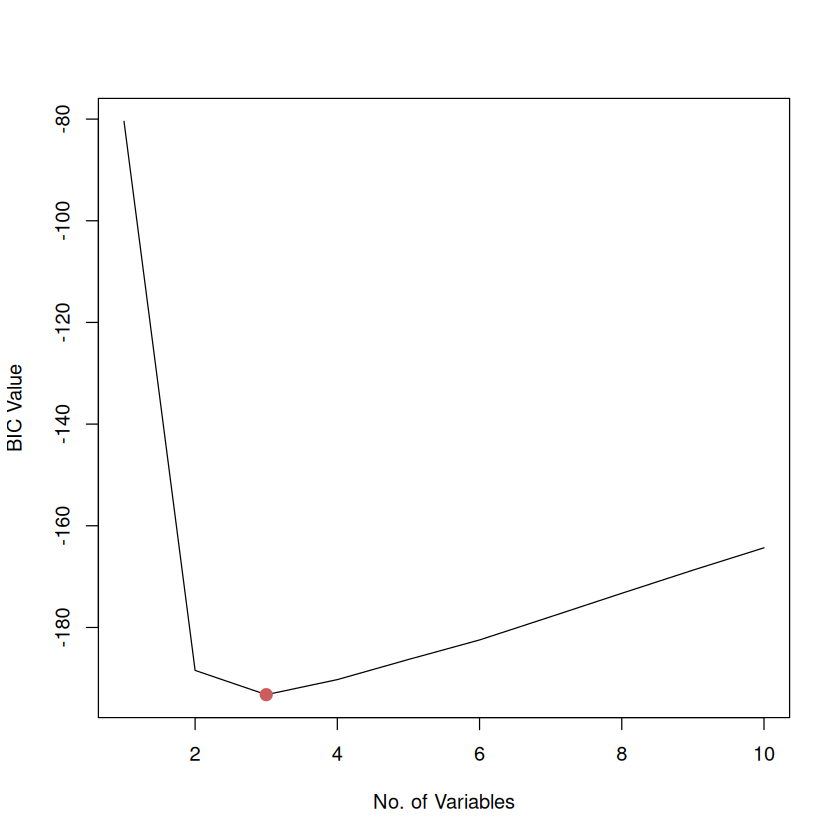

In [12]:
plot(rsummary$bic, xlab = 'No. of Variables', ylab = 'BIC Value', type = 'l')
points(3, rsummary$bic[3], col = 'indianred', cex = 2, pch = 20)

The lowest **BIC** criterion value is observed in the model with 3 variables.

In [13]:
rsummary$adjr2 # based on adjusted R-squared criterion the optimal model has 4 variables: X, X^2, X^3 and X^10

[1] 0.5878569 0.8649659 0.8757709 0.8765051 0.8759951 0.8756157 0.8743056
 [8] 0.8729256 0.8715839 0.8704084

Estimated coefficients for the best model according to the **Adjusted R-squared** value.

In [14]:
coef(results, 4) # coefficient estimates associated with this model 

(Intercept)            X          X.2          X.3         X.10 
1.051390e+00 3.098303e-01 4.171896e-01 1.364469e-01 7.068773e-06

plot(rsummary$adjr2, xlab = 'No. of Variables', ylab = 'Adjusted R-squared', type = 'l')
points(4, rsummary$adjr2[4], col = 'indianred', cex = 2, pch = 20)

The highest **Adjusted R-squared** value is observed in the model with 4 variables. However, from the model with 3 variables onward, the subsequent values show little variation.

Since the penalty used by the BIC criterion is `log(n)d`, it is subtracted from the previously obtained BIC values.These values are adjusted considering the penalty corresponding to the AIC criterion, which is `2d`.

In [16]:
n <- length(df$Y) # no. of observations
d <- apply(rsummary$which, 1, sum) # no. of predictors for each model

In [17]:
aic <- rsummary$bic - log(n) * d + 2 * d # AIC values

In [18]:
aic # based on AIC criterion the optimal model has 3 variables: X, X^2 and X^3

1          2          3          4          5          6          7 
 -85.65371 -196.26369 -203.63992 -203.27981 -201.92595 -200.68997 -198.72334 
         8          9         10 
-196.72431 -194.77898 -192.98511

Estimated coefficients for the best model according to the **AIC criterion**.

In [19]:
coef(results, 3) # coefficient estimates associated with this model 

(Intercept)           X         X.2         X.3 
  1.0244635   0.2802336   0.4560302   0.1470615

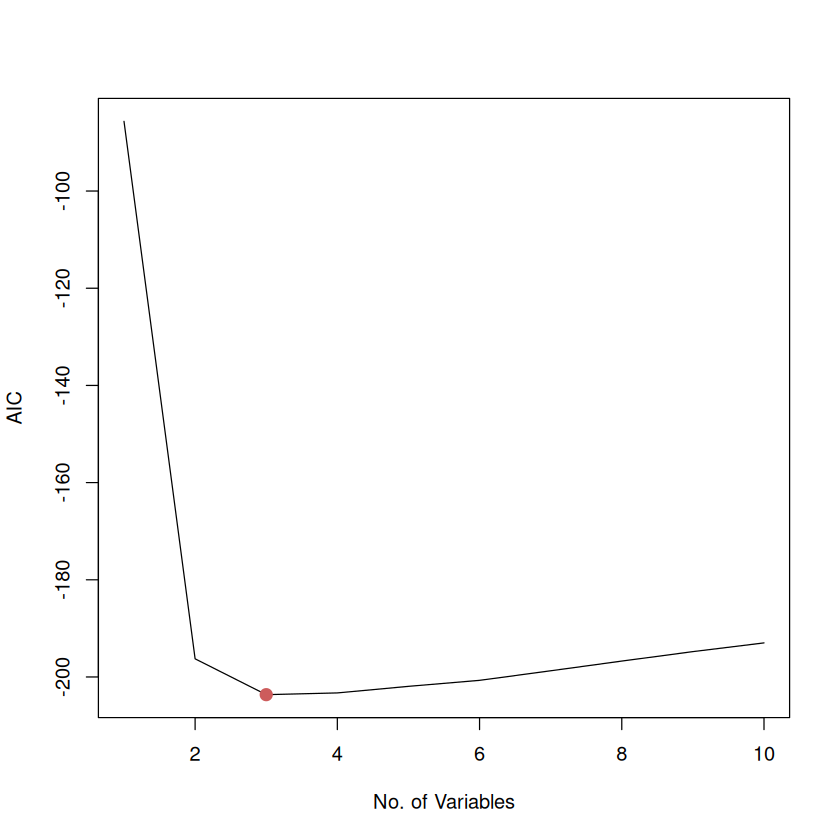

In [20]:
plot(aic, xlab = 'No. of Variables', ylab = 'AIC', type = 'l')
points(3, aic[3], col = 'indianred', cex = 2, pch = 20)

As with the previous criterion, the lowest **AIC** value is obtained in the model with 3 variables.

***

According to the **AIC** and **BIC** criteria, the best model consists of 3 variables: $X, X^2, X^3$. However, based on the **Adjusted R-squared** criterion, the optimal model includes 4 variables, which, according to the `regsubsets` function summary, correspond to $X, X^2, X^3, X^{10}$.

Considering model parsimony, in this case, we would opt for the 3-variable model. By using fewer predictors, a balance between simplicity and explanatory power is achieved. This is a fundamental principle, as simpler models are often preferred due to their ease of interpretation and lower risk of overfitting.

### *Forward Stepwise* Selection

In [21]:
results_forward_method <- regsubsets(Y~., data = df, nvmax = 10, method = 'forward') # maximum size of subsets to examine nvmax = 10
summary(results_forward_method)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df, nvmax = 10, method = "forward")
10 Variables  (and intercept)
     Forced in Forced out
X        FALSE      FALSE
X.2      FALSE      FALSE
X.3      FALSE      FALSE
X.4      FALSE      FALSE
X.5      FALSE      FALSE
X.6      FALSE      FALSE
X.7      FALSE      FALSE
X.8      FALSE      FALSE
X.9      FALSE      FALSE
X.10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          X   X.2 X.3 X.4 X.5 X.6 X.7 X.8 X.9 X.10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " " 
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " " 
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " " 
4  ( 1 )  "*" "*" "*" " " " " " " " " " " " " "*" 
5  ( 1 )  "*" "*" "*" " " " " " " " " " " "*" "*" 
6  ( 1 )  "*" "*" "*" " " "*" " " " " " " "*" "*" 
7  ( 1 )  "*" "*" "*" " " "*" " " "*" " " "*" "*" 
8  ( 1 )  "*" "*" "*" "*" "*" " " "*" " " "*" "*" 
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" " " "*" "*" 
10  ( 1 ) "*" 

In [22]:
rsummary_forward_method <- summary(results_forward_method)

In [23]:
rsummary_forward_method$bic # based on BIC criterion the optimal model has 3 variables: X, X^2 and X^3

[1]  -80.44337 -188.44818 -193.21924 -190.25396 -185.79362 -181.54472
 [7] -177.88198 -173.27724 -168.68383 -164.32823

Estimated coefficients for the best model according to the **BIC criterion**.

In [24]:
coef(results_forward_method, 3) # coefficient estimates associated with this model 

(Intercept)           X         X.2         X.3 
  1.0244635   0.2802336   0.4560302   0.1470615

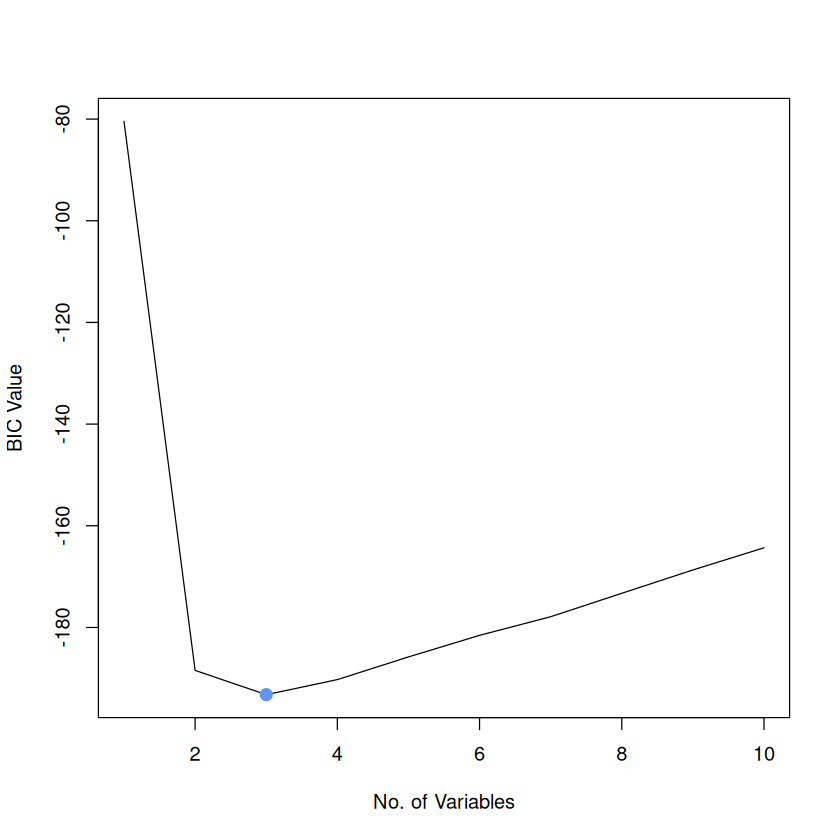

In [25]:
plot(rsummary_forward_method$bic, xlab = 'No. of Variables', ylab = 'BIC Value', type = 'l')
points(3, rsummary_forward_method$bic[3], col = 'cornflowerblue', cex = 2, pch = 20)

In [26]:
rsummary_forward_method$adjr2 # based on adjusted R-squared criterion the optimal model has 4 variables: X, X^2, X^3 and X^10

[1] 0.5878569 0.8649659 0.8757709 0.8765051 0.8753719 0.8744798 0.8743056
 [8] 0.8729249 0.8715281 0.8704084

Estimated coefficients for the best model according to the **Adjusted R-squared value**.

In [27]:
coef(results_forward_method, 4) # coefficient estimates associated with this model 

(Intercept)            X          X.2          X.3         X.10 
1.051390e+00 3.098303e-01 4.171896e-01 1.364469e-01 7.068773e-06

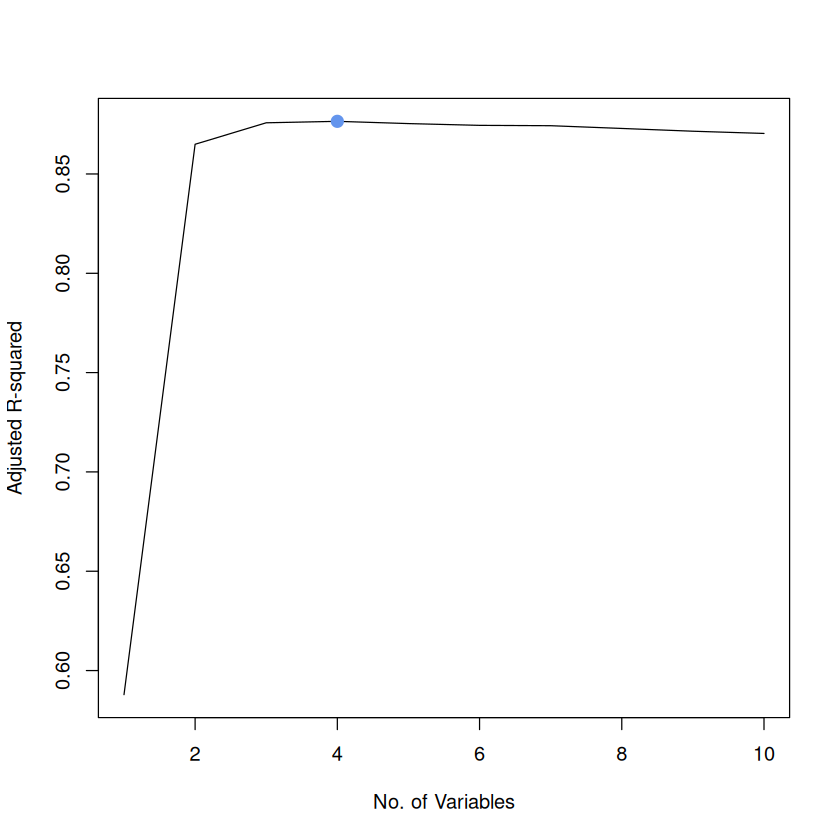

In [28]:
plot(rsummary_forward_method$adjr2, xlab = 'No. of Variables', ylab = 'Adjusted R-squared', type = 'l')
points(4, rsummary_forward_method$adjr2[4], col = 'cornflowerblue', cex = 2, pch = 20)

In [29]:
d <- apply(rsummary_forward_method$which, 1, sum) # no. of predictors for each model
aic <- rsummary_forward_method$bic - log(n) * d + 2 * d # AIC values
aic # based on AIC criterion the optimal model has 3 variables: X, X^2 and X^3

1          2          3          4          5          6          7 
 -85.65371 -196.26369 -203.63992 -203.27981 -201.42464 -199.78091 -198.72334 
         8          9         10 
-196.72377 -194.73554 -192.98511

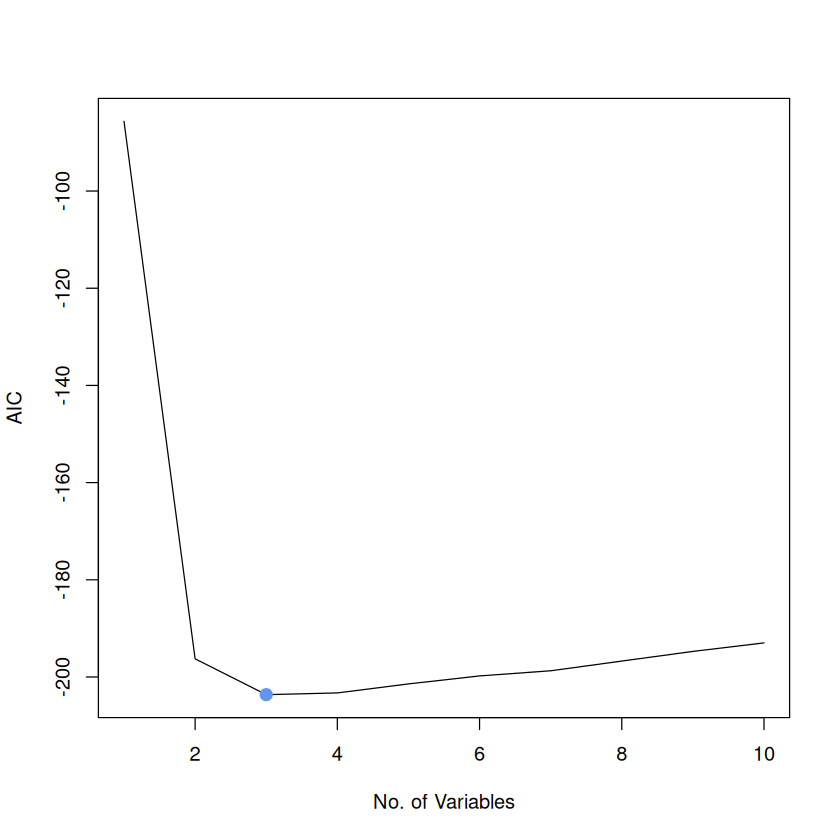

In [30]:
plot(aic, xlab = 'No. of Variables', ylab = 'AIC', type = 'l')
points(3, aic[3], col = 'cornflowerblue', cex = 2, pch = 20)

### *Backward Stepwise* Selection

In [31]:
results_backward_method <- regsubsets(Y~., data = df, nvmax = 10, method = 'backward') # maximum size of subsets to examine nvmax = 10
summary(results_backward_method)

Subset selection object
Call: regsubsets.formula(Y ~ ., data = df, nvmax = 10, method = "backward")
10 Variables  (and intercept)
     Forced in Forced out
X        FALSE      FALSE
X.2      FALSE      FALSE
X.3      FALSE      FALSE
X.4      FALSE      FALSE
X.5      FALSE      FALSE
X.6      FALSE      FALSE
X.7      FALSE      FALSE
X.8      FALSE      FALSE
X.9      FALSE      FALSE
X.10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          X   X.2 X.3 X.4 X.5 X.6 X.7 X.8 X.9 X.10
1  ( 1 )  " " " " " " "*" " " " " " " " " " " " " 
2  ( 1 )  "*" " " " " "*" " " " " " " " " " " " " 
3  ( 1 )  "*" " " " " "*" "*" " " " " " " " " " " 
4  ( 1 )  "*" " " " " "*" "*" "*" " " " " " " " " 
5  ( 1 )  "*" " " " " "*" "*" "*" " " "*" " " " " 
6  ( 1 )  "*" " " " " "*" "*" "*" "*" "*" " " " " 
7  ( 1 )  "*" " " " " "*" "*" "*" "*" "*" " " "*" 
8  ( 1 )  "*" " " " " "*" "*" "*" "*" "*" "*" "*" 
9  ( 1 )  "*" " " "*" "*" "*" "*" "*" "*" "*" "*" 
10  ( 1 ) "*

In [32]:
rsummary_backward_method <- summary(results_backward_method)

In [33]:
rsummary_backward_method$bic # BIC values using the backward stepwise method

[1]  -51.48611 -140.83914 -170.32080 -180.26185 -178.14810 -180.75614
 [7] -177.09311 -172.81798 -168.72727 -164.32823

In this case, the model with the lowest **BIC** value corresponds to the one with 6 variables ($X, X^4, X^5, X^6, X^7, X^8$). However, starting from the model with 4 variables, the **BIC** values do not vary significantly. Therefore, choosing the model with 6 variables would be counterproductive, as its BIC value is only slightly lower than that of the model with 4 variables, which could unnecessarily increase the model's complexity.

Estimated coefficients for the best model according to the **BIC** criterion.

In [34]:
coef(results_backward_method, 4) # coefficient estimates associated with this model 

(Intercept)            X          X.4          X.5          X.6 
 1.207720102  0.501665215  0.120701793  0.014547152 -0.007940403

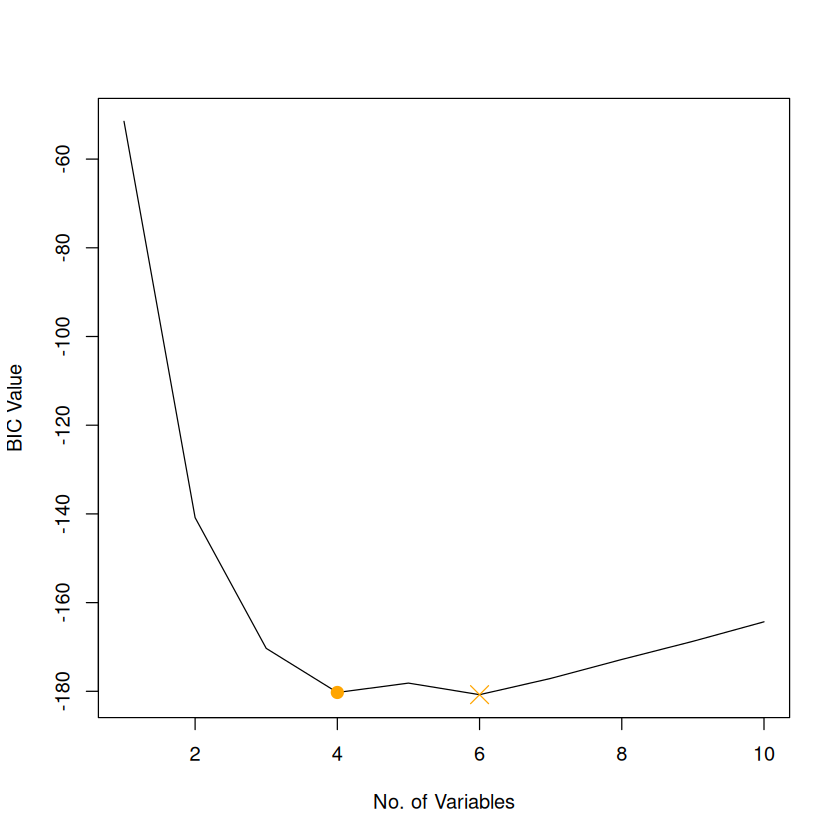

In [35]:
plot(rsummary_backward_method$bic, xlab = 'No. of Variables', ylab = 'BIC Value', type = 'l')
points(4, rsummary_backward_method$bic[4], col = 'orange', cex = 2, pch = 20)
points(6, rsummary_backward_method$bic[6], col = 'orange', cex = 2, pch = 4)

In [36]:
rsummary_backward_method$adjr2 # Adjusted R-squared values using the backward stepwise method

[1] 0.4494361 0.7826264 0.8438039 0.8635278 0.8654697 0.8734861 0.8733102
 [8] 0.8723400 0.8715839 0.8704084

The model with the lowest **Adjusted R-squared** corresponds to the one that includes 6 variables.

In [37]:
coef(results_backward_method, 7) # coefficient estimates associated with this model 

(Intercept)             X           X.4           X.5           X.6 
 1.1131485203  0.4231183750  0.3841674290  0.0333580719 -0.1137694946 
          X.7           X.8          X.10 
-0.0020943203  0.0131550963 -0.0005068324

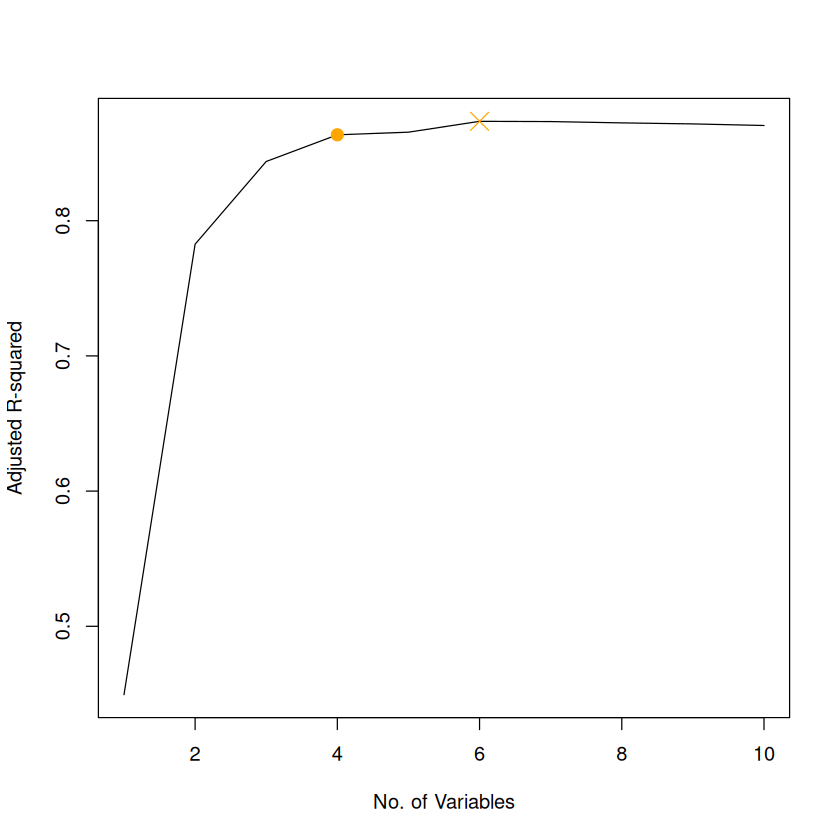

In [38]:
plot(rsummary_backward_method$adjr2, xlab = 'No. of Variables', ylab = 'Adjusted R-squared', type = 'l')
points(4, rsummary_backward_method$adjr2[4], col = 'orange', cex = 2, pch = 20)
points(6, rsummary_backward_method$adjr2[6], col = 'orange', cex = 2, pch = 4)

In this case, by observing the curve, we see that the model with 6 variables has the highest value, which significantly differs from the model with 4 variables. However, as mentioned earlier, simpler models are generally preferred due to their ease of interpretation and lower risk of overfitting. Therefore, it is recommended to choose the model with the least complexity.

In [39]:
d <- apply(rsummary_backward_method$which, 1, sum) # no. of predictors for each model
aic <- rsummary_backward_method$bic - log(n) * d + 2 * d # AIC values
aic # based on AIC criterion the optimal model has 6 variables: X, X^4, X^5, X^6, X^7, and X^8

1          2          3          4          5          6          7 
 -56.69646 -148.65465 -180.74148 -193.28770 -193.77913 -198.99233 -197.93447 
         8          9         10 
-196.26451 -194.77898 -192.98511

Estimated coefficients for the best model according to the **AIC** criterion.

In [40]:
coef(results_backward_method, 6) # coefficient estimates associated with this model 

(Intercept)            X          X.4          X.5          X.6          X.7 
 1.134359454  0.403532570  0.280452158  0.041993620 -0.054241294 -0.003319692 
         X.8 
 0.003166853

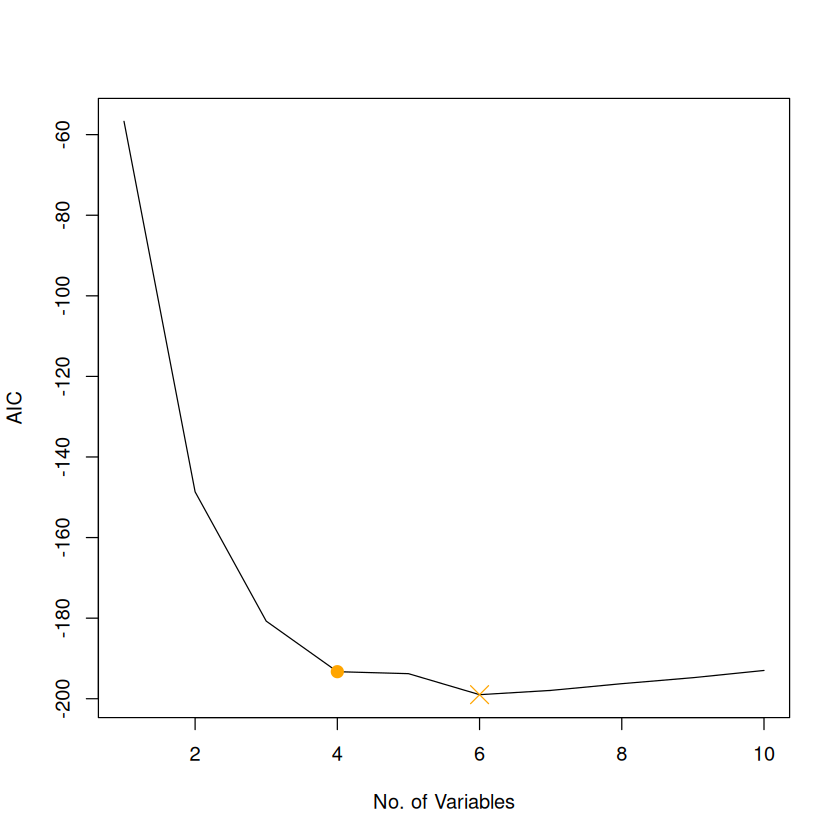

In [41]:
plot(aic, xlab = 'No. of Variables', ylab = 'AIC', type = 'l')
points(6, aic[6], col = 'orange', cex = 2, pch = 4)
points(4, aic[4], col = 'orange', cex = 2, pch = 20)

### Comparison of Model Selection Methods

When applying the *forward stepwise* method, the results are similar to those obtained with the *exhaustive* method. According to the **BIC** and **AIC** criteria, the best model includes the variables $X, X^2, X^3$. However, based on the **Adjusted R-squared** criterion, the optimal model includes the variables $X, X^2, X^3, X^{10}$. In both cases, it is preferable to opt for the more parsimonious model.

On the other hand, the results of the *backward stepwise* method differ significantly from the other approaches. The lowest values for the criteria are obtained when selecting 6 variables. However, it is recommended to choose the model with 4 variables, as the difference between them is not large enough to justify an increase in model complexity.

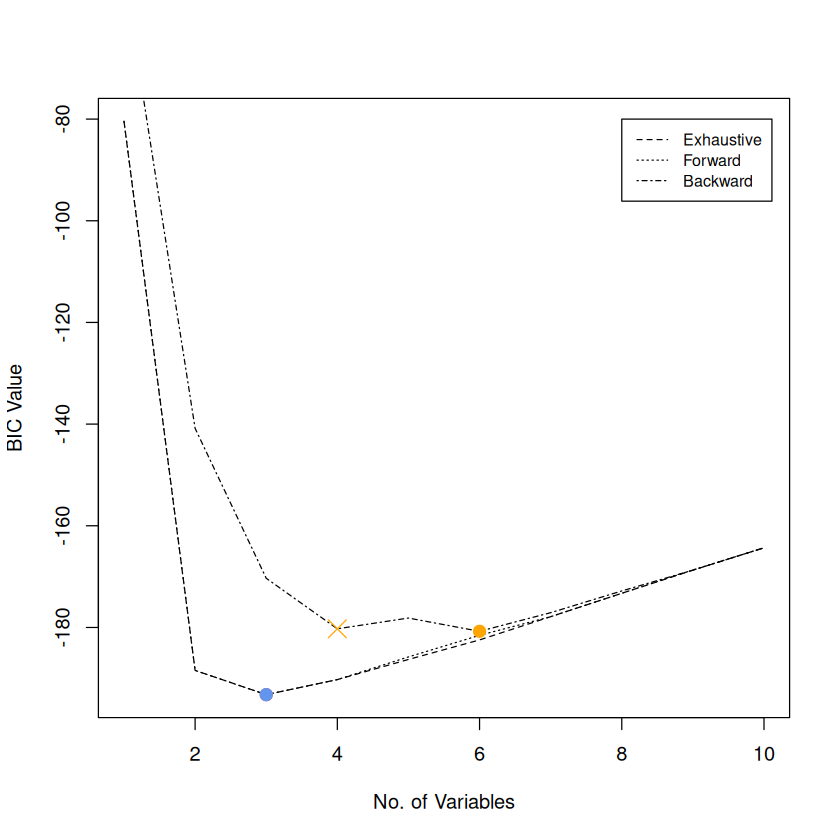

In [42]:
plot(rsummary$bic, xlab = 'No. of Variables', ylab = 'BIC Value', type = 'l', lty = 2) # BIC values exhaustive stepwise method
lines(rsummary_forward_method$bic, lty = 3) # BIC values forward stepwise method
lines(rsummary_backward_method$bic, lty = 4) # BIC values backward stepwise method
points(3, rsummary$bic[3], col = 'indianred', cex = 2, pch = 20)
points(3, rsummary_forward_method$bic[3], col = 'cornflowerblue', cex = 2, pch = 20)
points(4, rsummary_backward_method$bic[4], col = 'orange', cex = 2, pch = 4)
points(6, rsummary_backward_method$bic[6], col = 'orange', cex = 2, pch = 20)
legend(8, -80, legend = c('Exhaustive', 'Forward', 'Backward'),
       lty = 2:4, cex = 0.8) # add legend

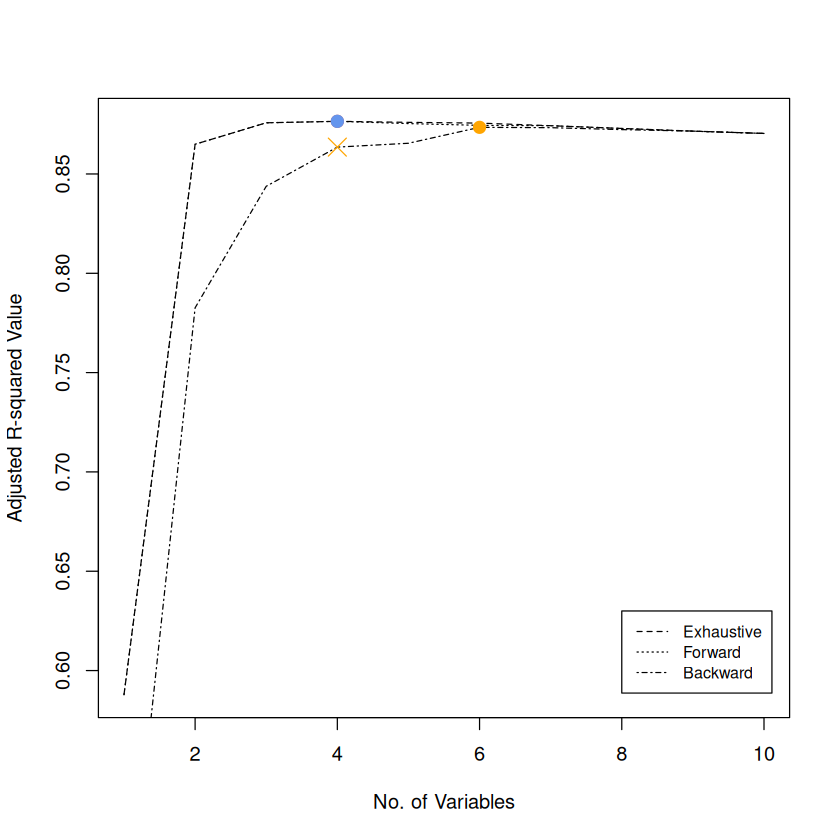

In [43]:
plot(rsummary$adjr2, xlab = 'No. of Variables', ylab = 'Adjusted R-squared Value', type = 'l', lty = 2) # BIC values exhaustive stepwise method
lines(rsummary_forward_method$adjr2, lty = 3) # BIC values forward stepwise method
lines(rsummary_backward_method$adjr2, lty = 4) # BIC values backward stepwise method
points(4, rsummary$adjr2[4], col = 'indianred', cex = 2, pch = 20)
points(4, rsummary_forward_method$adjr2[4], col = 'cornflowerblue', cex = 2, pch = 20)
points(4, rsummary_backward_method$adjr2[4], col = 'orange', cex = 2, pch = 4)
points(6, rsummary_backward_method$adjr2[6], col = 'orange', cex = 2, pch = 20)
legend(8, 0.63, legend = c('Exhaustive', 'Forward', 'Backward'),
       lty = 2:4, cex = 0.8) # add legend

### Exercise 2.0

We have seen that as the number of features used in a model increases, the training error will necessarily decrease, but the test error may not. We will now explore this in a simulated data set.

- Generate a data set with $p = 20$ features, $n = 1000$ observations, and an associated quantitative response vector generated according to the model

$$
Y = X\beta + \epsilon,
$$

where $\beta$ has some elements that are exactly equal to zero.

- Split your data set into a training set containing $100$ observations and a test set containing $900$ observations.
- Perform best subset selection on the training set, and plot the training set MSE associated with the best model of each size.
- Plot the test set MSE associated with the best model of each size.
- For which model size does the test error MSE take its minimum value? Comment on your results. If it reaches its minimum in a model that only contains an intercept or in a model that includes all features, then play with how you're generating the data in (a) until you find a scenario where the test error MSE is minimized for an intermediate model size.

- How does the model that minimizes the test error compare with the true model used to generate the data? Comment on the coefficient values.


In [44]:
library(leaps) # loading library leaps for model selection functions

In [45]:
set.seed(614)
n <- 1000 # no. of observations
p <- 20 # no. of features

In [46]:
error <- rnorm(n) # error terms

In [47]:
X <- matrix(runif(n * p, -1, 1), n, p) # create a matrix with 1000 rows and 20 columns

In [48]:
b <- rnorm(p) # vector of beta values
b[3] = b[4] = b[7] = b[8] = b[12] = b[15] = 0 # randomly assign 0 to some betas 

In [49]:
Y <- X %*% b + error # response vector

In [50]:
index <- sample(1:n, 100, replace = FALSE) # indices to be chosen
X_train <- X[index,]
y_train <- Y[index,] # training set contains 100 observations
X_test <- X[-index,]
y_test <- Y[-index,] # test set contains 900 observations

### Training Mean Squared Error (MSE)

In [51]:
train_df = data.frame(y = y_train, x = X_train) # training dataframe

#### Subset Selection using *Exhaustive Method*

In [52]:
results <- regsubsets(y~., data = train_df, nvmax = p) # model selection using exhaustive method

In [53]:
training_MSE_values <- c() # empty vector to store MSE values
for(i in 1:p){
    predictions <- model.matrix(y~., data = train_df, nvmax = p)[, names(coef(results, i))] %*% coef(results, i)
    training_MSE_values[i] = mean((predictions - y_train)^2)
} # compute training MSE values for each model with i predictors 

In [54]:
cat('Index of the smallest MSE value:', which.min(training_MSE_values), '\nSmallest MSE value', training_MSE_values[20]) # 

Index of the smallest MSE value: 20 
Smallest MSE value 0.9041558

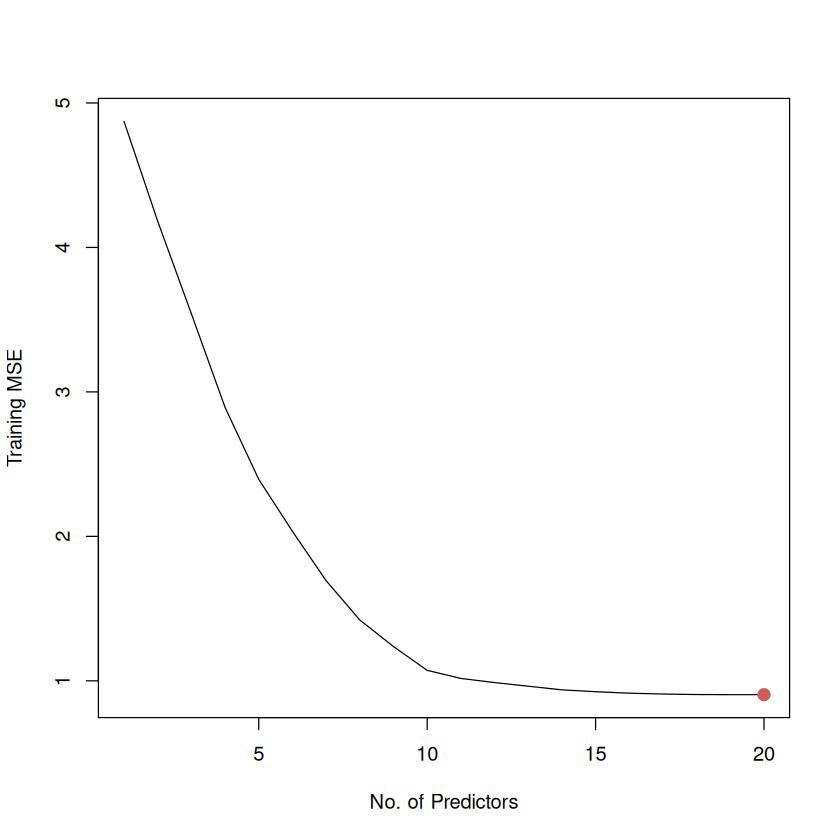

In [55]:
plot(training_MSE_values, xlab = 'No. of Predictors', ylab = 'Training MSE', type = 'l')
points(20, training_MSE_values[20], col = 'indianred', cex = 2, pch = 20)

The lowest training MSE is obtained when the model includes all available predictors, with a value close to $0.90$.


### Test Mean Squared Error (MSE)

In [56]:
test_df = data.frame(y = y_test, x = X_test) # testing dataframe

In [57]:
testing_MSE_values <- c() # empty vector to store MSE values
for(i in 1:p){
    predictions <- model.matrix(y~., data = test_df, nvmax = p)[, names(coef(results, i))] %*% coef(results, i)
    testing_MSE_values[i] = mean((predictions - y_test)^2)
} # compute training MSE values for each model with i predictors 

In [58]:
cat('Index of the smallest MSE value:', which.min(testing_MSE_values), '\nSmallest MSE value', testing_MSE_values[11]) # 

Index of the smallest MSE value: 11 
Smallest MSE value 1.161698

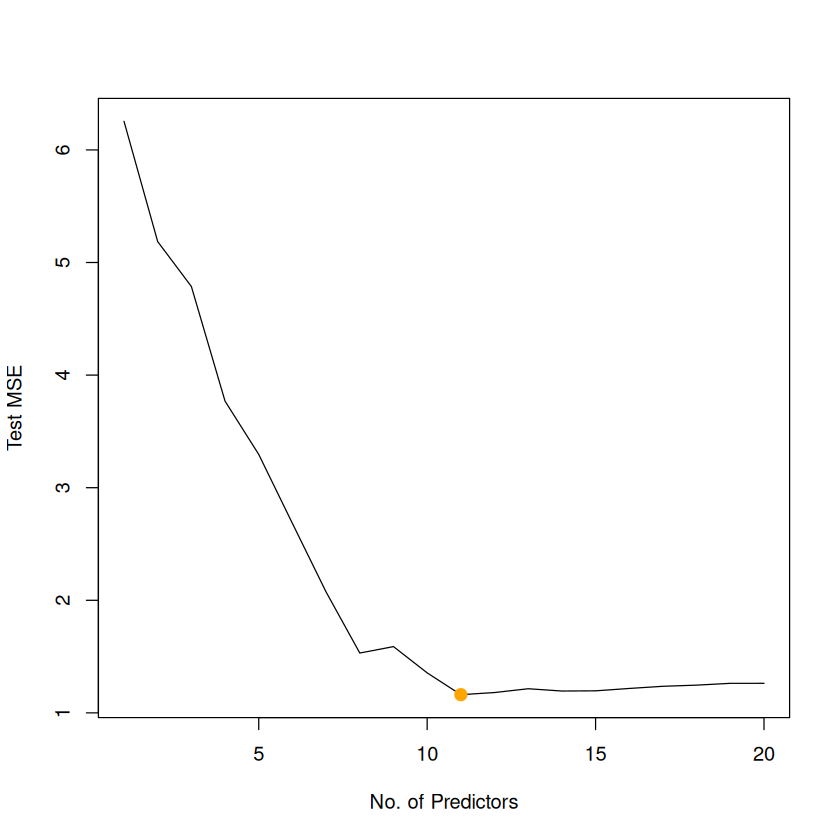

In [59]:
plot(testing_MSE_values, xlab = 'No. of Predictors', ylab = 'Test MSE', type = 'l')
points(11, testing_MSE_values[11], col = 'orange', cex = 2, pch = 20)

Unlike the previous case, the lowest test MSE is obtained by considering an intermediate number of predictors, specifically 11, resulting in a value of approximately $1.16$.

It is important to note that $min~MSE_{test} > min~MSE_{train}$.

### Relationship Between Model Flexibility and Mean Squared Error Behavior

As model flexibility increases, the mean squared error (MSE) in the training set tends to decrease, reaching its lowest value when considering all the available features. However, this pattern is not observed in the test set MSE, where the minimum value is achieved by including an intermediate number of features, in this case, 11 out of the 20 available.

In conclusion, it is not guaranteed that the model with the lowest MSE in the training set will also have the lowest MSE in the test set. Regardless of overfitting, it is expected that the MSE of the training set will always be lower than that of the test set, since most statistical learning methods are designed to explicitly or implicitly minimize the MSE in the training process.

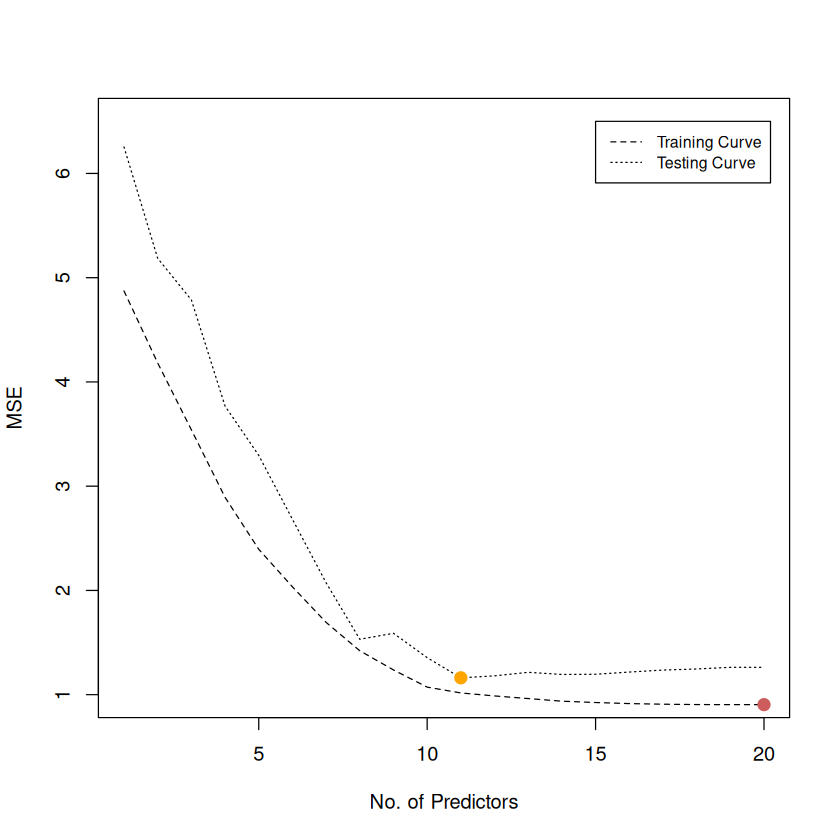

In [60]:
plot(training_MSE_values, xlab = 'No. of Predictors', ylab = 'MSE', ylim = c(1, 6.5), type = 'l', lty = 2)
lines(testing_MSE_values, lty = 3)
points(20, training_MSE_values[20], col = 'indianred', cex = 2, pch = 20) # smallest training MSE value
points(11, testing_MSE_values[11], col = 'orange', cex = 2, pch = 20) # smallest testing MSE value
legend(15, 6.5, legend = c('Training Curve', 'Testing Curve'),
       lty = 2:3, cex = 0.8) # add legend

Coefficients of the Model that Minimize the Test MSE

In [ ]:
coef(results, which.min(testing_MSE_values))

The coefficient values were initialized as $\beta_3 = \beta_4 = \beta_7 = \beta_8 = \beta_{12} = \beta_{15} = 0$. In the model that minimizes the test mean squared error (MSE), these values remain consistent, indicating that the variables associated with these coefficients are not part of the proposed model.

***

MSc Statistical Computing by Mathematics Research Center (CIMAT Monterrey)

October 2024